# Fractional Brownian Motion and the Hurst Parameter

In this section, we will showcase one potential application of visibility graphs, related to Fractional Brownian Motion and the Hurst parameter. The Hurst parameter quantifies the level of *long-range depencence* in a time series. 

A time series is one which exhibits a "non-negligible dependence between the present and all points in the past." ([Graves et al, 2017](https://www.readcube.com/library/ee993268-97d7-4f91-b728-eb1b1ac33f55:16c9b3e2-d8ac-477d-bb46-a230bf7b3368)). An early observation of this type of process in nature was made by a civil engineer named Harold Edwin Hurst, who was tasked with the design of dams for water control in the Nile basin for the Egyptian government in the first part of the 20th century ([Graves et al, 2017](https://www.readcube.com/library/ee993268-97d7-4f91-b728-eb1b1ac33f55:16c9b3e2-d8ac-477d-bb46-a230bf7b3368)). 

Hurst found the importance of long memory when studying the optimal reservoir capacity for a man-made reservoir, which is equivalent to choosing the height of the dam that creates the reservoir. The ideal height of a dam is a height that achieves the minimum water capacity so that the reservoir has stable outflow and level. Prior to Hurst, a simulation approach using independent Gaussian processes had been among the best solutions to this dam height problem ([Graves et al, 2017](https://www.readcube.com/library/ee993268-97d7-4f91-b728-eb1b1ac33f55:16c9b3e2-d8ac-477d-bb46-a230bf7b3368)).

Hurst was able to show that independent Gaussian processes used in models at the time did not adquately explain a large amount of empirical hydrological data, and suggested that the assumption that the process is Gaussian-independent was incorrect ([Graves et al, 2017](https://www.readcube.com/library/ee993268-97d7-4f91-b728-eb1b1ac33f55:16c9b3e2-d8ac-477d-bb46-a230bf7b3368)).

While Hurst is widely credited with an early observation of long-range dependence, Mandelbrot played a larger role in utilizing and developing the concept. In a 1968 paper, Mandelbrot proposed *Fractional Brownian Motion*, which is related to both Hurst's hydrological model and to Brownian Motion, which was gaining attention in the literature on financial prices at the time ([Graves et al, 2017](https://www.readcube.com/library/ee993268-97d7-4f91-b728-eb1b1ac33f55:16c9b3e2-d8ac-477d-bb46-a230bf7b3368), [Mandelbrot & Ness, 1968](https://www.readcube.com/library/ee993268-97d7-4f91-b728-eb1b1ac33f55:7fea8485-93e4-452f-bd5e-1016c2ce08f3), [Bachelier, 1900](https://dx.doi.org/10.24033/asens.476)). 

[Mandelbrot & Ness, 1968](https://www.readcube.com/library/ee993268-97d7-4f91-b728-eb1b1ac33f55:7fea8485-93e4-452f-bd5e-1016c2ce08f3)

[Graves et al, 2017](https://www.readcube.com/library/ee993268-97d7-4f91-b728-eb1b1ac33f55:16c9b3e2-d8ac-477d-bb46-a230bf7b3368)

[Bachelier, 1900](https://dx.doi.org/10.24033/asens.476)

$$
\def \fbminta {\int_{-\inf}^{0} \left[ (t-s)^{H-1/2} - (-s)^{H-1/2} \right]\, dB(s, \w)}
\def \fbmintb {\int_{0}^{t} (t-s)^{H-1/2}\, dB(s, \w)}
\def \fbmintao {\int_{-\inf}^{0} \left[ (t-s) - (-s) \right]\, dB(s, \w)}
\def \fbmintbo {\int_{0}^{t} (t-s)\, dB(s, \w)}
\def \bh {B_{H}}
\def \w { \omega}
\def \inf {\infty}
\def \gm {\Gamma}
$$

**Fractional Brownian Motion** ([Mandelbrot & Ness, 1968](https://www.readcube.com/library/ee993268-97d7-4f91-b728-eb1b1ac33f55:7fea8485-93e4-452f-bd5e-1016c2ce08f3)). Let $H$ be a number such that $0<H<$, and let $b_0$ be a real number. The function $\bh(t, \w)$ is called *reduced fractional Brownian motion* with parameter $H$ and starting value $b_0$ at time $0$. For $t>0$, $\bh(t, \w)$ is defined by $\bh (0, \w) = b_0$, and:

$$
\begin{align}
%\bh (0, \w) &= b_0 \\
\bh(t, \w) - \bh(0, \w) &= 
    \frac{1}{\gm \left(H+ \frac{1}{2}\right)} \left\{\fbminta + \fbmintb \right\}
\end{align}
$$

Note that when $H=1/2$, $\gm (H+1/2)=\gm(1)=1$ and the exponent terms in the integrals are zero, which means that the first integral term zeros out, so that the difference is simply the white noise measure $B(t, \w)$.

The above definiton of Fractional Brownian Motion is not necessarily intuitive, and for the purpose of this writing it is more productive to simulate examples with different values of $H$.  

First, we import some local modules and other items needed for the interactive plot:

In [5]:
from src import helpers 
from src import fbm_plot
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from warnings import warn
interact_hurst = lambda button_lab : interact.options(manual=True, 
                                                      manual_name=button_lab)

...note that the code which generates these series is in the folder `src`. The docstring can be viewed by running `?fbm_plot.plot_fbm_examples`. 

After running the below cell, it is possible to plot different realizations of Fractional Brownian Motion by clicking "Calculate":

In [8]:
@interact_hurst('Calculate')
def interactive_fbm_plot(h1='0.5', h2='0.75', h3='0.25'):
    """Takes input in interact decorator and creates fbm plots"""
    if any([x == '' for x in (h1, h2, h3)]):
        fbm_plot.plot_fbm_examples()
    else:
        try:
            p = []
            for x in (h1, h2, h3):
                p.append(float(x))
            p = tuple(p)
        except Exception as e:
            msg = (f'Error when trying to convert hurst params to float, '
                   f'is it numeric? Received "{(h1, h2, h3)}".') 
            warn(msg)
            raise Exception(msg)
        if any([x <= 0 or x >= 1 for x in p]):
            msg = f'Hurst params must be in [0, 1], received "{p}".'
            warn(msg)
            raise Exception(msg)
        fbm_plot.plot_fbm_examples(*p)

interactive(children=(Text(value='0.5', description='h1'), Text(value='0.75', description='h2'), Text(value='0…

# Scratchpad

In [ ]:
raise Exception()

In [ ]:
# https://docs.sympy.org/latest/modules/functions/special.html
from sympy.functions.special.gamma_functions import gamma

d = [gamma(x) for x in range(1,11)]
d

$$
\begin{align}
\bh(t, \w) - \bh(0, \w) &= \int_{-\inf}^{0} 1\, dB(s, \w) + \int_{0}^{t} 1\, dB(s, \w) \\
    &= \int_{-\inf}^{t} 1\, dB(s, \w) \\
\end{align}
$$

In [ ]:
from sympy.functions.special.gamma_functions import gamma

In [ ]:
from sympy import *

In [ ]:
f = Function('f')
y = Symbol('y')
t = Symbol('t')

In [ ]:
d = integrate(f(y), (y, -oo, t))
d

In [ ]:
d = integrate(1, (y, -np.inf, t))
d

In [ ]:
simplify(d)

In [ ]:
oo

In [ ]:
gamma(1)

In [ ]:
from matplotlib import pyplot as plt

# create figure and axis
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# create "x" values, different Hurst params
h = np.linspace(0.01,0.99,100)

# create "y" values, the gamma function multiplier in Mandelbrot & Ness 1968
g = lambda h: 1/float(gamma(h+0.5))
y = [g(x) for x in h]
ax.plot(h, y)
ax.xaxis.set(ticks=np.linspace(0,1,5),)
xlab = 'Hurst Parameter (H)'
ylab = 'FBM Multiplier'
ax.set(xlabel=xlab, ylabel=ylab,
       title=f'{ylab} in {xlab}')
ax.grid()

In [ ]:
?ax.set

In [ ]:
from scipy.special import gamma
d = [gamma(x) for x in range(1,11)]
d

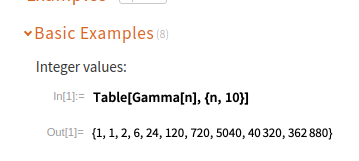

https://reference.wolfram.com/language/ref/Gamma.html

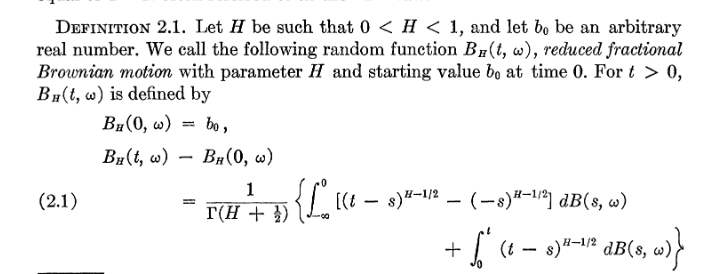